In [1]:
import serial
from serial.tools import list_ports
import time

from matplotlib import pyplot as plt

import numpy as np

In [25]:
COM_PORT = None

while(COM_PORT == None):
	time.sleep(0.1)
	print("Checking for USB interface")
	for port in list_ports.comports():
		if(port.description == "50x50-Drive"):
			COM_PORT = port.device
			break

print("Interface found on", COM_PORT)

ser = serial.Serial(COM_PORT, 115200)

Checking for USB interface
Interface found on /dev/cu.usbmodem2075319942531


In [26]:
while(ser.in_waiting > 1):
    ser.read()
ser.read_until(b'\r').decode("utf-8")

current_values = []
for i in range(500):
    value = ser.read_until(b'\r').decode("utf-8")
    current_values.append([int(i) for i in value.split()])
        

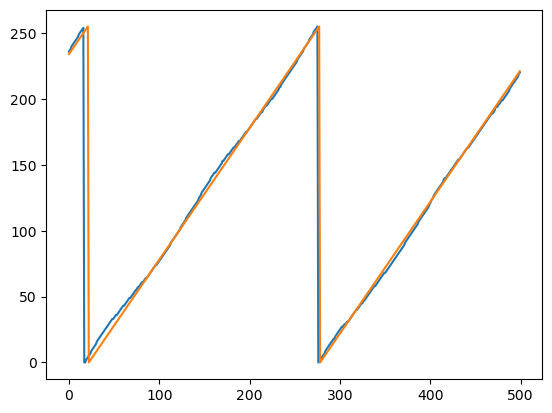

In [15]:
plt.plot(current_values)
# plt.vlines([165, 209], 0, 256)

print()

In [8]:
current_values[0][0] - current_values[0][1]

-39

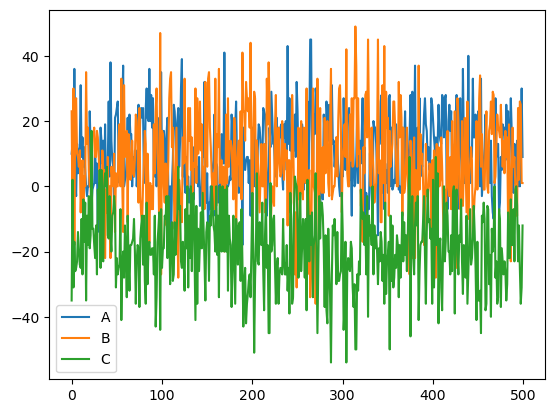

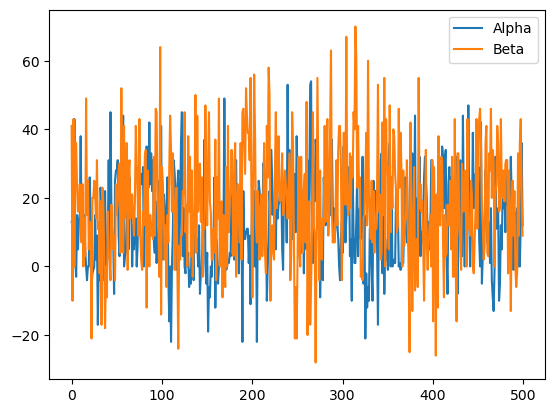

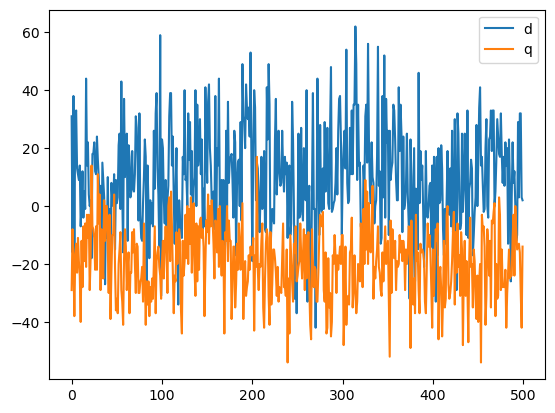

In [27]:
current_values = np.array(current_values)

angles = current_values[:,0] * (2 * np.pi) / 256.0 
angles = range(len(current_values))

dq_list = []

for values in current_values:
    angle = values[0] * (2 * np.pi) / 256.0
    d = np.cos(angle) * values[4] + np.sin(angle) * values[5]
    q = np.cos(angle) * values[5] - np.sin(angle) * values[4]

    dq_list.append([d,q])

dq_list = np.array(dq_list)
# plt.plot(current_values[:, 0])
plt.plot(angles, current_values[:, 1], label = "A")
plt.plot(angles, current_values[:, 2], label = "B")
plt.plot(angles, current_values[:, 3], label = "C")
plt.legend()

plt.show()

plt.plot(angles, current_values[:, 4], label = "Alpha")
plt.plot(angles, current_values[:, 5], label = "Beta")
plt.legend()

plt.show()

plt.plot(angles, current_values[:, 6], label = "d")
plt.plot(angles, current_values[:, 7], label = "q")
plt.legend()

plt.show()

In [389]:
# overall_current = []
# for values in current_values:
#     overall_current.append( np.sqrt(values[0]**2 + values[1]**2 + values[2]**2))
# print(current_values)
plt.plot(current_values)
    
current_values = np.array(current_values)
# plt.plot(current_values[:, 0])
# plt.plot(current_values[:, 1])
# plt.plot(current_values[:, 2])

IndexError: list index out of range

In [314]:
while(ser.in_waiting > 1):
    ser.read()
print(ser.in_waiting)

1


In [73]:
ser.close()
print("Closed")

Closed
